In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r'D:\Datasets\archive\Data_Train.xlsx',engine='openpyxl')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
31h 30m      1
40h 20m      1
42h 5m       1
42h 45m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [11]:
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [14]:
df["Departure_hour"]=pd.to_datetime(df.Dep_Time).dt.hour

In [15]:
df["Departure_minute"]=pd.to_datetime(df.Dep_Time).dt.minute

In [16]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour

In [19]:
df['Arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [20]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
duration=list(df.Duration)

In [22]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [23]:
df["duration_hour"]=duration_hours
df["duration_minutes"]=duration_mins

In [24]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
df.drop(['Duration'],axis=1,inplace=True)

In [26]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [27]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

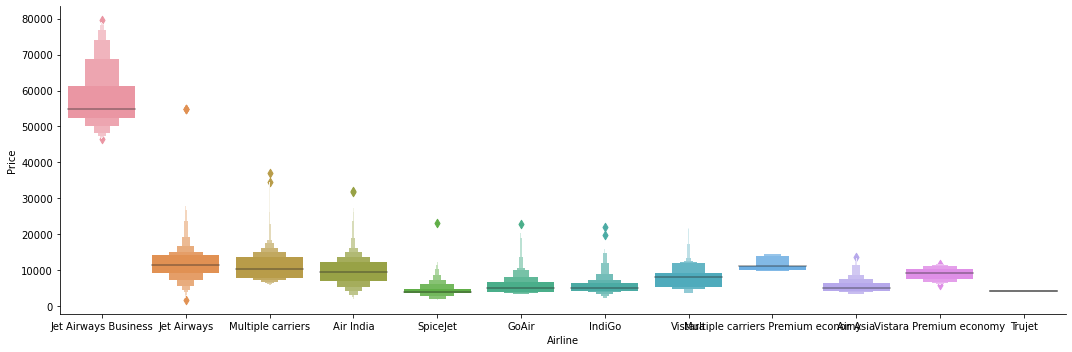

In [28]:
sns.catplot(y='Price',x='Airline',data=df.sort_values(by='Price',ascending=False),kind='boxen',aspect=3)
plt.show()

In [29]:
airline=df.Airline
airline = pd.get_dummies(airline,drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

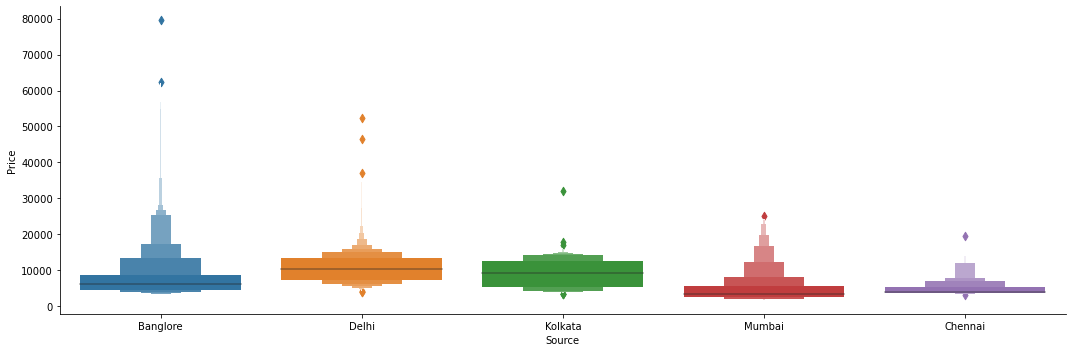

In [31]:
sns.catplot(y="Price",x='Source',data = df.sort_values(by='Price',ascending=False),kind='boxen',aspect=3)
plt.show()

In [32]:
source=pd.get_dummies(df.Source,drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
destination=pd.get_dummies(df.Destination,drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
df.groupby('Route').size()

Route
BLR → AMD → DEL                 18
BLR → BBI → DEL                  5
BLR → BDQ → DEL                  8
BLR → BOM → AMD → DEL            5
BLR → BOM → BHO → DEL           11
                              ... 
DEL → PNQ → COK                 42
DEL → RPR → NAG → BOM → COK     17
DEL → TRV → COK                 16
DEL → UDR → BOM → COK           18
MAA → CCU                      381
Length: 128, dtype: int64

In [35]:
df.Route.value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BLR → CCU → BBI → HYD       1
CCU → IXA → BLR                   1
BOM → JDH → JAI → DEL → HYD       1
BOM → COK → MAA → HYD             1
BLR → HBX → BOM → NAG → DEL       1
Name: Route, Length: 128, dtype: int64

In [36]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [37]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [38]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

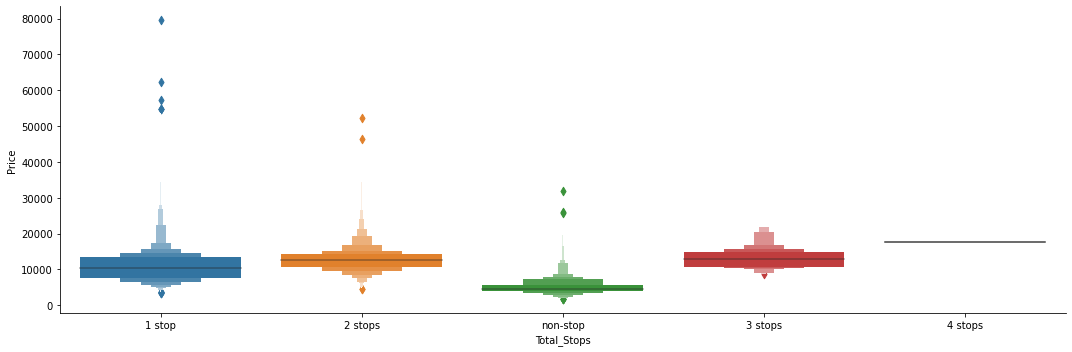

In [39]:
sns.catplot(y='Price',x='Total_Stops',data=df.sort_values(by='Price',ascending=False),kind='boxen',aspect=3)
plt.show()

In [40]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
train_data=pd.concat([df,source,destination,airline],axis=1)

In [42]:
train_data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,13:15,2,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,5,18,5,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,3,16,50,...,0,1,0,0,0,0,0,0,0,0


In [43]:
train_data.drop(['Airline','Source','Destination','Arrival_Time'],axis=1,inplace=True)

In [44]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0


In [45]:
train_data.shape

(10682, 30)

In [47]:
Y=train_data['Price']
X=train_data.drop(['Price'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=42)

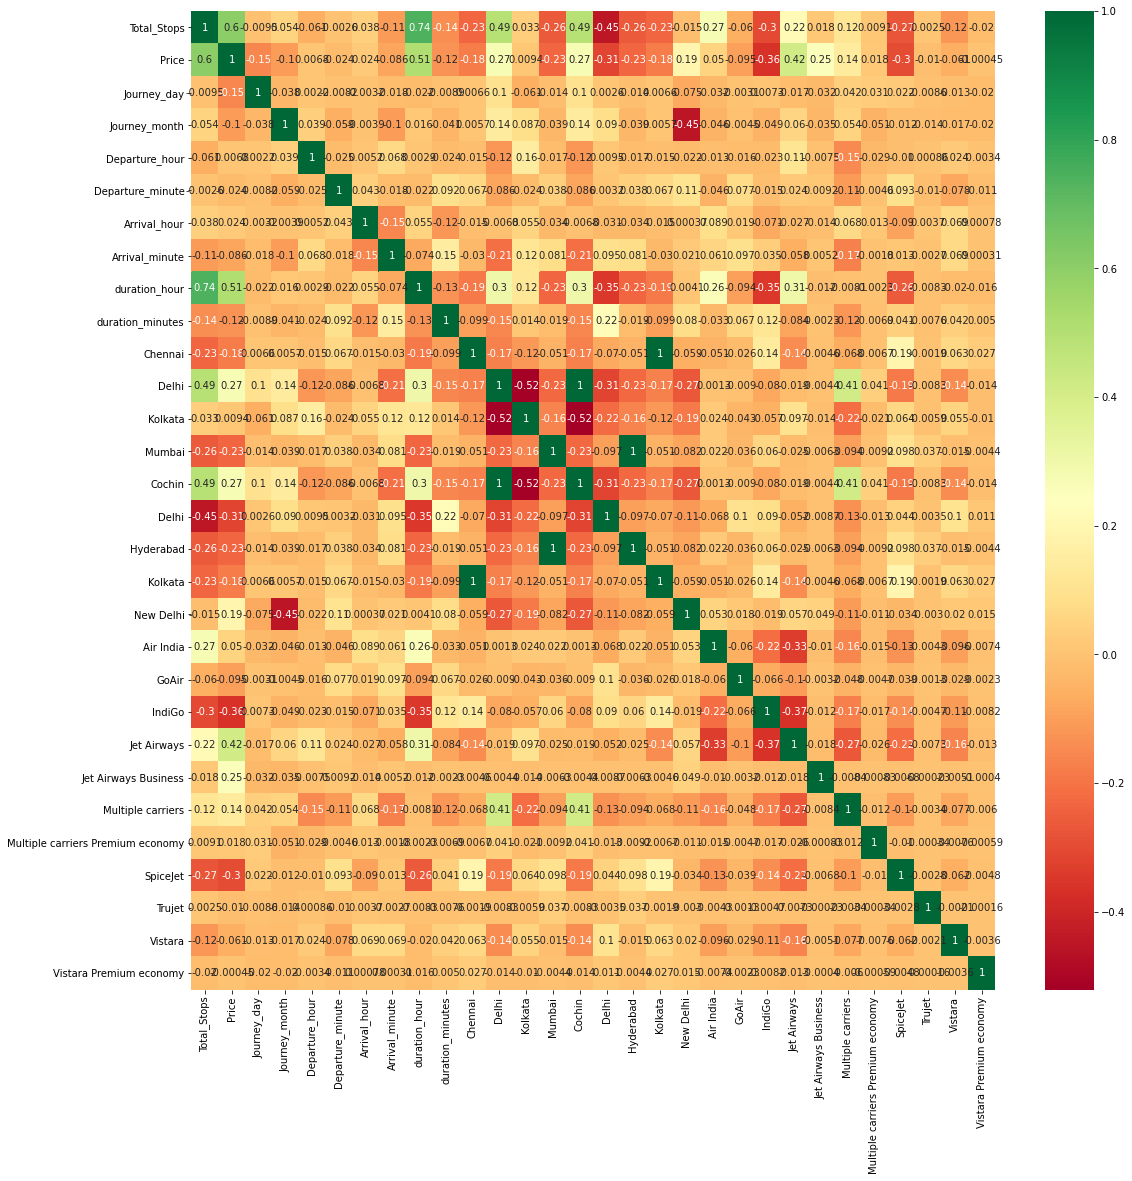

In [49]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
model = RandomForestRegressor()

In [52]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
model.score(x_train,y_train)

0.9563023398972833

In [56]:
from sklearn.metrics import r2_score
pred_test = model.predict(x_test)
r2_score(y_test,pred)

0.7998279452702287

In [60]:
from sklearn.model_selection import RandomizedSearchCV


In [61]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [63]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [74]:
rf_mod=rf_random.best_estimator_

In [75]:
rf_mod.score(x_test,y_test)

0.8210114826804702

In [76]:
import pickle
# open a file, where you ant to store the data
file = open('flight_fare_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_mod, file)